In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('/Users/macbookproci9/Documents/HousePricePredection/HousePrices.csv')

In [3]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
# Summary statistics
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
# Checking for missing values
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [33]:
# Data Pre-processing
data['POSTED_BY'] = data['POSTED_BY'].astype('category')
data['BHK_OR_RK'] = data['BHK_OR_RK'].astype('category')
data['ADDRESS'] = data['ADDRESS'].astype('category')


In [39]:
# Select key features to simplify the dataset
selected_features = [
    'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 
    'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)', 
    'POSTED_BY', 'BHK_OR_RK'
]

# Create a subset of the data with selected features
data_subset = data[selected_features].copy()

In [40]:
# Separate numerical and categorical features
numerical_features = ['SQUARE_FT', 'LONGITUDE', 'LATITUDE']
categorical_features = ['POSTED_BY', 'BHK_OR_RK']

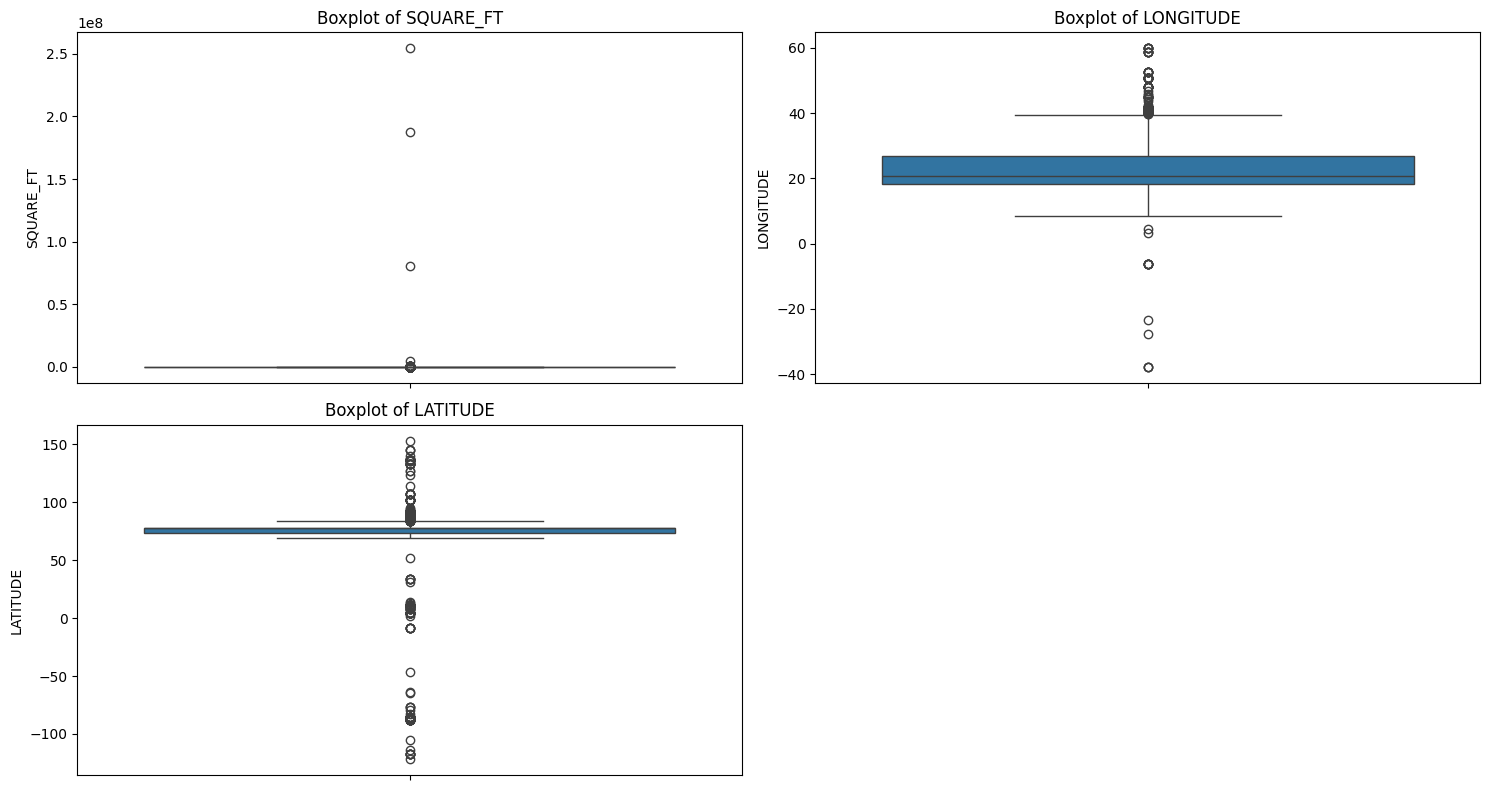

In [56]:
# Identify and visualize outliers
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [57]:
# Handling outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for feature in numerical_features:
    data_subset = handle_outliers(data_subset, feature)


In [58]:
# Scaling numerical features
scaler = StandardScaler()
data_subset[numerical_features] = scaler.fit_transform(data_subset[numerical_features])

In [59]:
# Encoding categorical features
data_subset = pd.get_dummies(data_subset, drop_first=True)

In [60]:
# Split the data into features and target
X = data_subset.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = data_subset['TARGET(PRICE_IN_LACS)']


In [61]:
# Sample a smaller subset of the data for all visualizations
data_sample = data_subset.sample(n=1000, random_state=42)


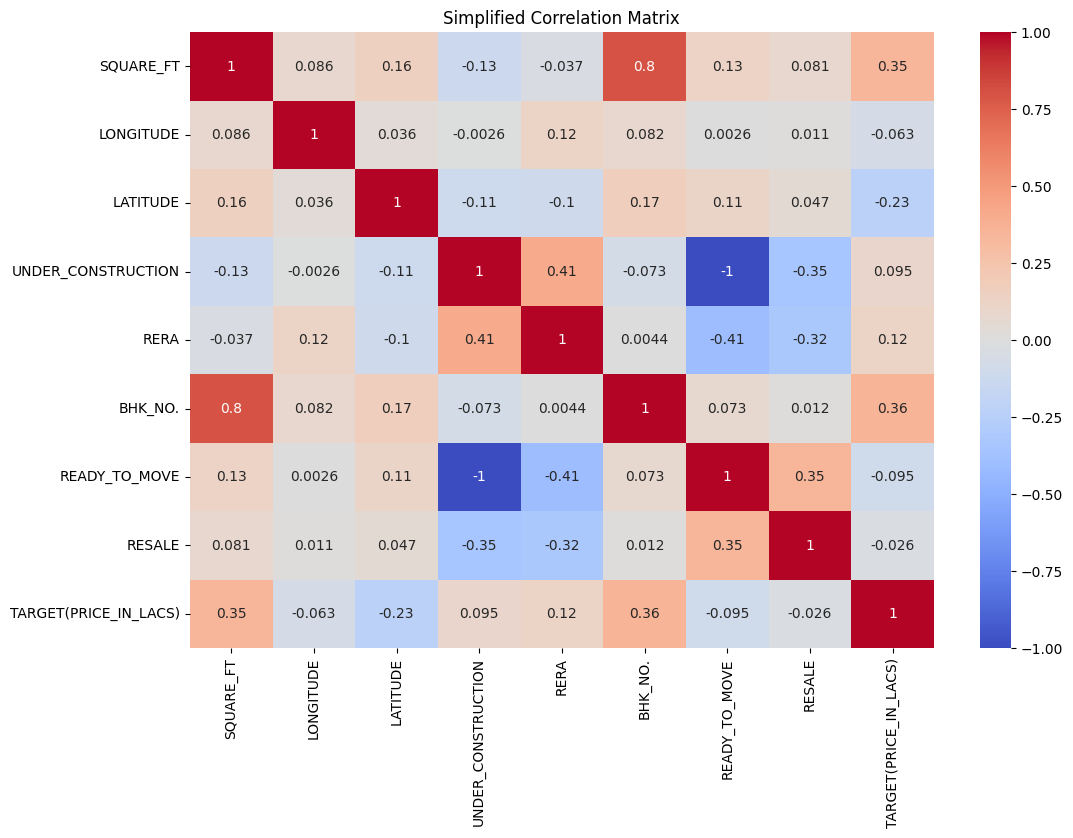

In [62]:
# Visualization: Simplified Correlation Matrix (only for numerical features)
plt.figure(figsize=(12, 8))
simplified_correlation_matrix = data_sample[numerical_features + ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'READY_TO_MOVE', 'RESALE', 'TARGET(PRICE_IN_LACS)']].corr()
sns.heatmap(simplified_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Simplified Correlation Matrix')
plt.show()

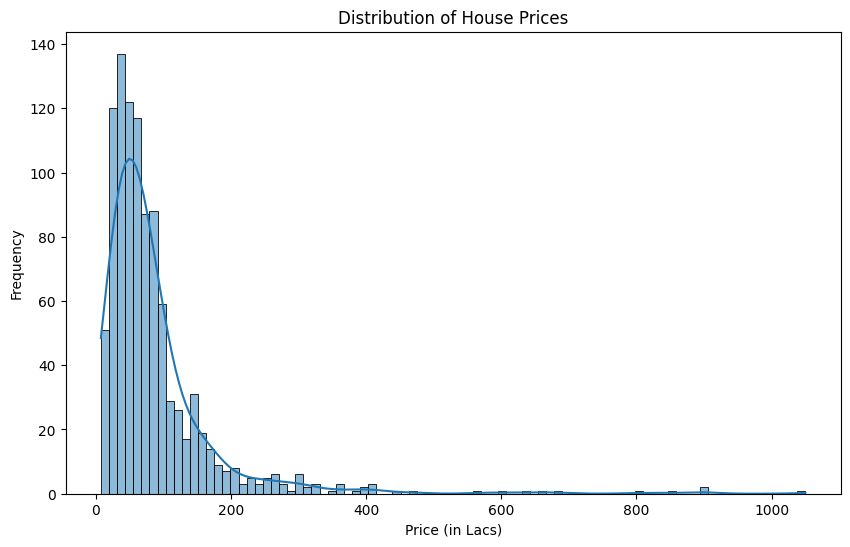

In [63]:
# Visualization: Distribution of the Target Variable (House Prices)
plt.figure(figsize=(10, 6))
sns.histplot(data_sample['TARGET(PRICE_IN_LACS)'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Lacs)')
plt.ylabel('Frequency')
plt.show()


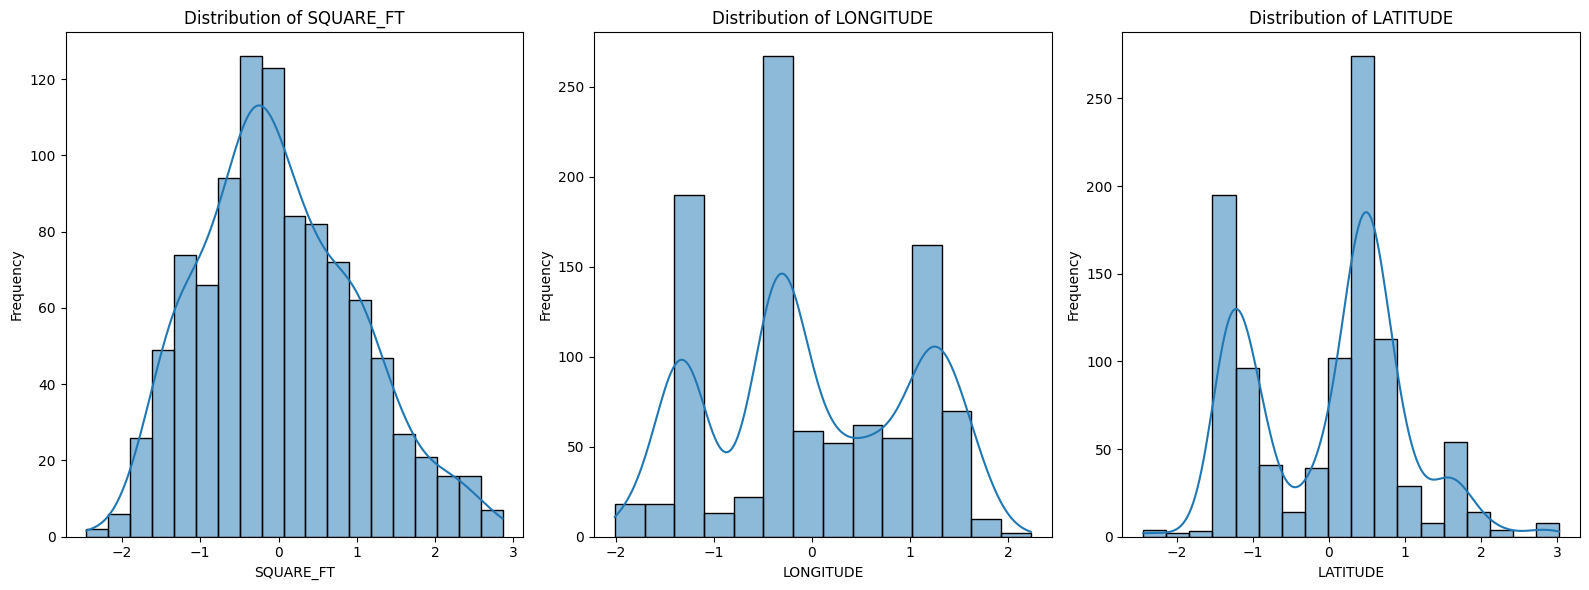

In [64]:
# Visualization: Distribution of Numerical Features
plt.figure(figsize=(16, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data_sample[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [66]:

from sklearn.model_selection import train_test_split
# Split the data into features and target
X = data_subset.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = data_subset['TARGET(PRICE_IN_LACS)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict on the test set
y_pred = model.predict(X_test)

In [69]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')



Mean Absolute Error (MAE): 48.463038458939955
Mean Squared Error (MSE): 11176.970511370722
R-squared (R2): 0.19055951714940644


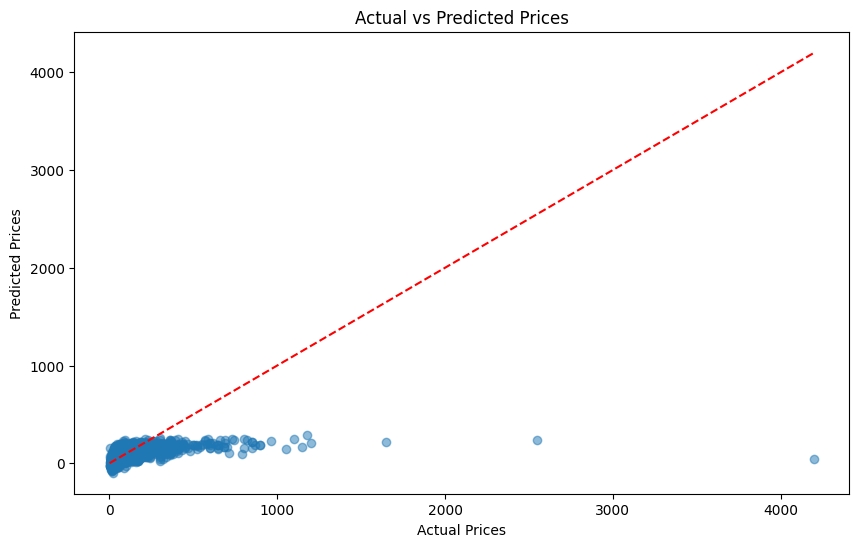

In [70]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [78]:
#using Lasso regression to regularize the model and see if it improves performance. ​
from sklearn.linear_model import Lasso

# Train the Lasso regression model with polynomial features
model_lasso = Lasso(alpha=1.0, max_iter=10000)
model_lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = model_lasso.predict(X_test)

# Calculate evaluation metrics for the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE) for lasso Model: {mae_lasso}')
print(f'Mean Squared Error (MSE) for lasso Model: {mse_lasso}')
print(f'R-squared (R2) for lasso Model: {r2_lasso}' )




Mean Absolute Error (MAE) for lasso Model: 91.01474734478398
Mean Squared Error (MSE) for lasso Model: 189036.35394077082
R-squared (R2) for lasso Model: 0.595976729163743


/usr/local/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.839e+08, tolerance: 8.573e+05
  model = cd_fast.enet_coordinate_descent(


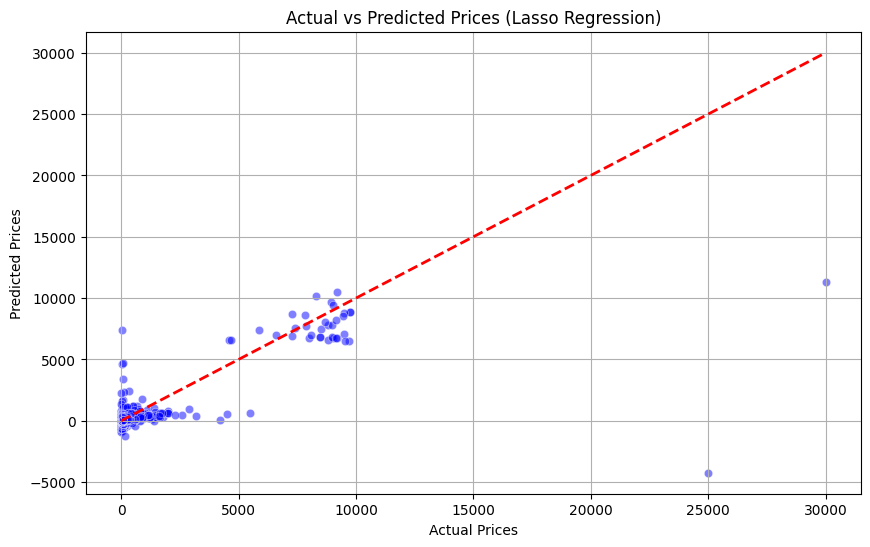

In [79]:
# Plotting Actual vs Predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='blue', edgecolors='w', linewidths=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Lasso Regression)')
plt.grid(True)
plt.show()


In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train the Random Forest model with polynomial features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE) for Random Forest model: {mae_rf}')
print(f'Mean Squared Error (MSE) for Random Forest model: {mse_rf}')
print(f'R-squared (R2) for Random Forest model: {r2_rf}' )




Mean Absolute Error (MAE) for Random Forest model: 35.43424714765673
Mean Squared Error (MSE) for Random Forest model: 72563.81163230346
R-squared (R2) for Random Forest model: 0.8449109501486942


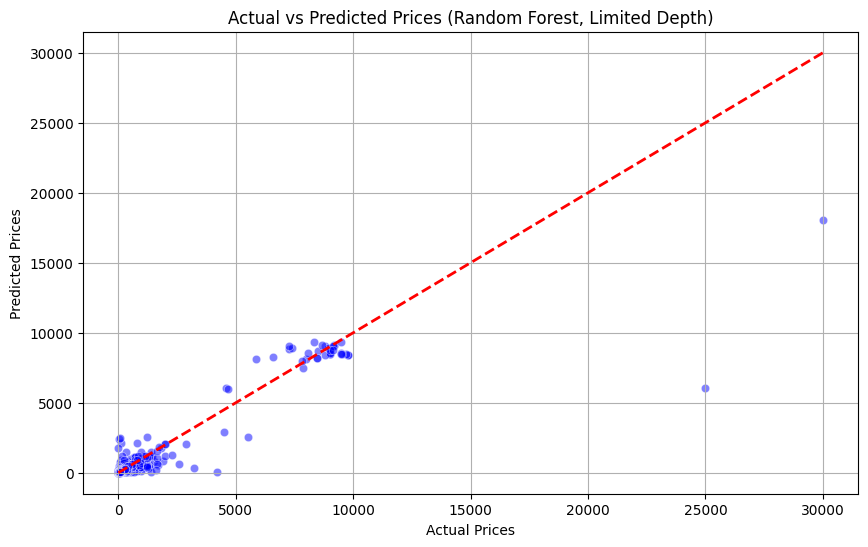

In [83]:
# Plotting Actual vs Predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', edgecolors='w', linewidths=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest, Limited Depth)')
plt.grid(True)
plt.show()

In [84]:

# Train the Gradient Boosting model with polynomial features
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE) for Gradient Boosting model: {mae_gb}')
print(f'Mean Squared Error (MSE) for Gradient Boosting model: {mse_gb}')
print(f'R-squared (R2) for Gradient Boosting model: {r2_gb}' )

Mean Absolute Error (MAE) for Gradient Boosting model: 47.38070590991943
Mean Squared Error (MSE) for Gradient Boosting model: 72822.02737331315
R-squared (R2) for Gradient Boosting model: 0.8443590712847122


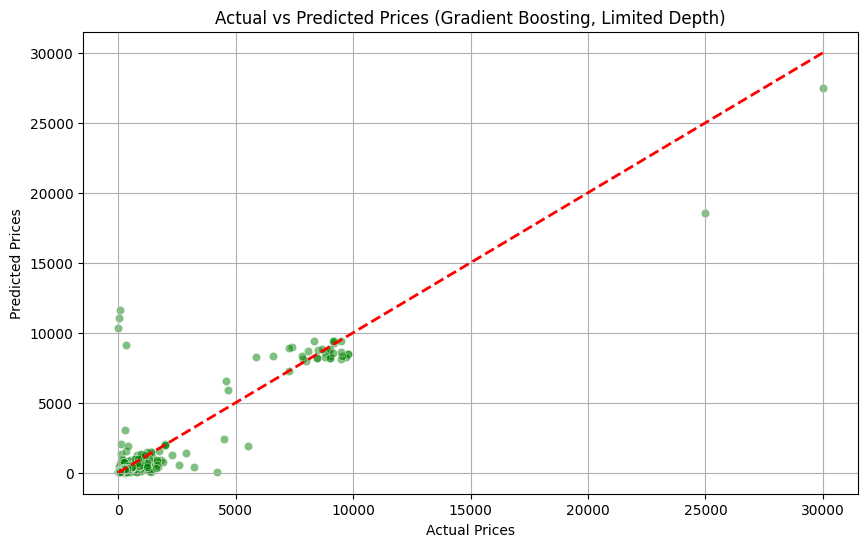

In [86]:
# Plotting Actual vs Predicted values for Gradient Boosting (Limited Depth)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='green', edgecolors='w', linewidths=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Gradient Boosting, Limited Depth)')
plt.grid(True)
plt.show()